In [1]:
import random
import numpy as np
import torch

from neuralee.embedding import NeuralEE
from neuralee.dataset import CortexDataset, HematoDataset, PbmcDataset, RetinaDataset 
from neuralee._aux import scatter, scatter_with_colorbar

%matplotlib inline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.manual_seed(1234)
random.seed(1234)
np.random.seed(1234)

File ../data/expression.bin already downloaded
Preprocessing Cortex data
Finished preprocessing Cortex data
Downsampling from 19972 to 558 genes
Compute affinity on downsample
Neural Elastic Embedding, lambda=10, completed in 10.47s, EE loss is 0.665090


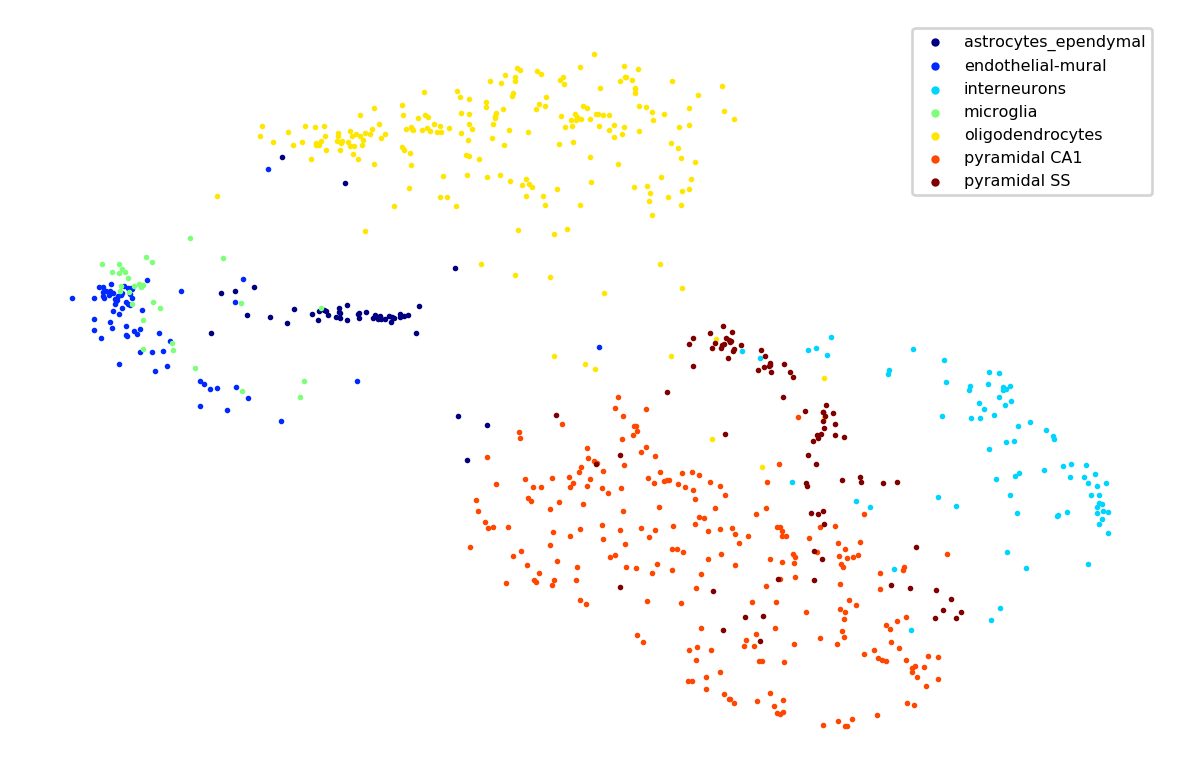

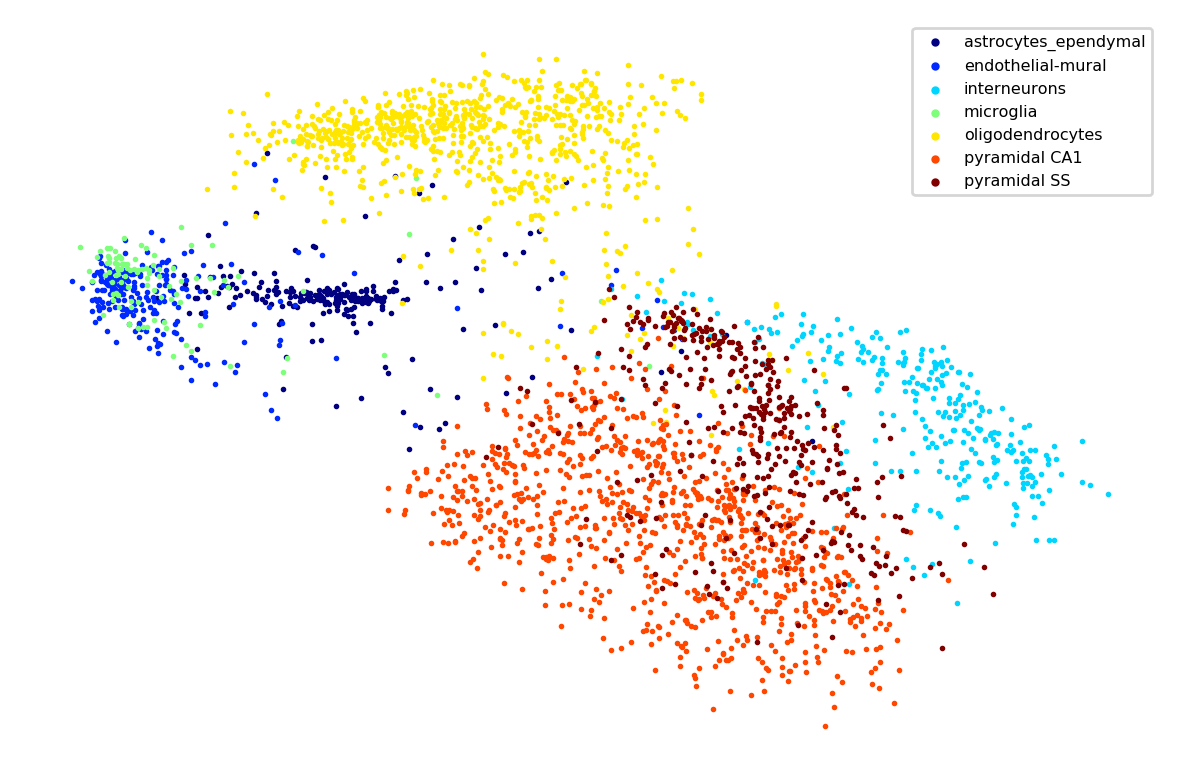

In [2]:
cortex_dataset = CortexDataset(save_path='../data/')
cortex_dataset.log_shift()
cortex_dataset.subsample_genes(558)  
cortex_dataset.standardscale()
NEE = NeuralEE(cortex_dataset, lam=10, device=device)
results_Neural = NEE.fine_tune(size=0.25)
scatter(results_Neural['X'].numpy(), results_Neural['sub_samples']['labels'], cortex_dataset.cell_types)
results_map = NEE.map(calculate_error=None)
scatter(results_map['X'].numpy(), NEE.labels, cortex_dataset.cell_types)

File ../data/HEMATO/bBM.raw_umifm_counts.csv.gz already downloaded
File ../data/HEMATO/data.zip already downloaded
Preprocessing Hemato data
Finished preprocessing Hemato data
Downsampling from 7397 to 500 genes
Compute affinity on downsample
Neural Elastic Embedding, lambda=10, completed in 6.53s, EE loss is 1.426216


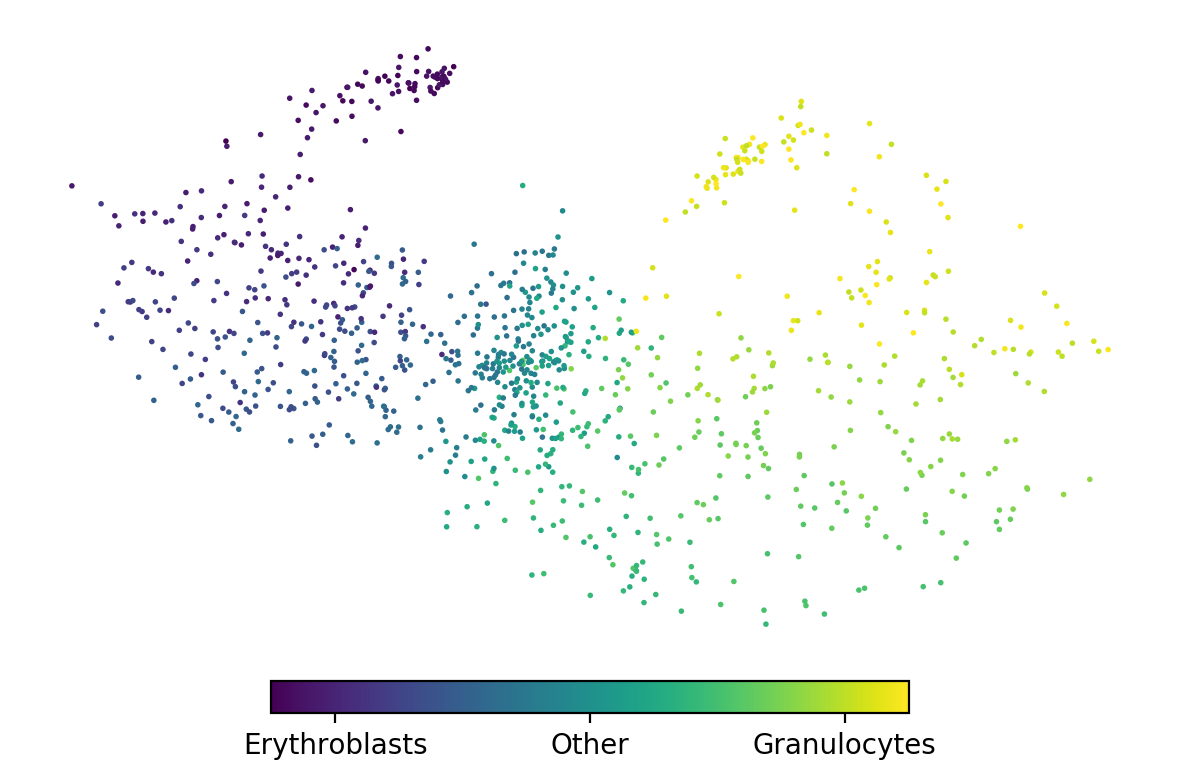

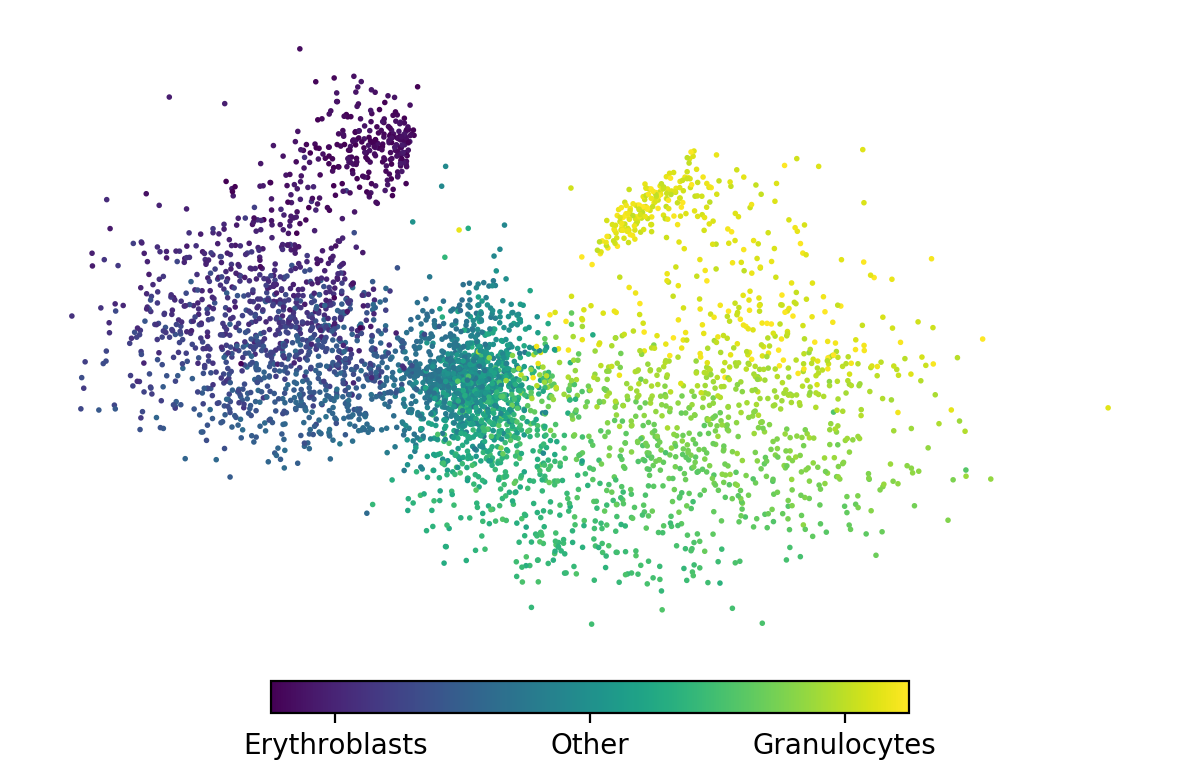

In [3]:
hemato_dataset = HematoDataset(save_path='../data/HEMATO/')
hemato_dataset.log_shift()
hemato_dataset.subsample_genes(500)  
hemato_dataset.standardscale()
NEE = NeuralEE(hemato_dataset, lam=10, device=device)
results_Neural = NEE.fine_tune(size=0.25)
scatter_with_colorbar(results_Neural['X'].numpy(), results_Neural['sub_samples']['labels'], ['Erythroblasts', 'Granulocytes'])
results_map = NEE.map(calculate_error=None)
scatter_with_colorbar(results_map['X'].numpy(), NEE.labels, ['Erythroblasts', 'Granulocytes'])

File ../data/gene_info_pbmc.csv already downloaded
File ../data/pbmc_metadata.pickle already downloaded
File ../data/10X/pbmc8k/filtered_gene_bc_matrices.tar.gz already downloaded
Preprocessing dataset
Finished preprocessing dataset
File ../data/10X/pbmc4k/filtered_gene_bc_matrices.tar.gz already downloaded
Preprocessing dataset
Finished preprocessing dataset
Keeping 33694 genes
Downsampling from 12721 to 11990 cells
Downsampling from 33694 to 3346 genes
Downsampling from 3346 to 500 genes
Compute affinity on downsample
Neural Elastic Embedding, lambda=10, completed in 8.97s, EE loss is 1.233181


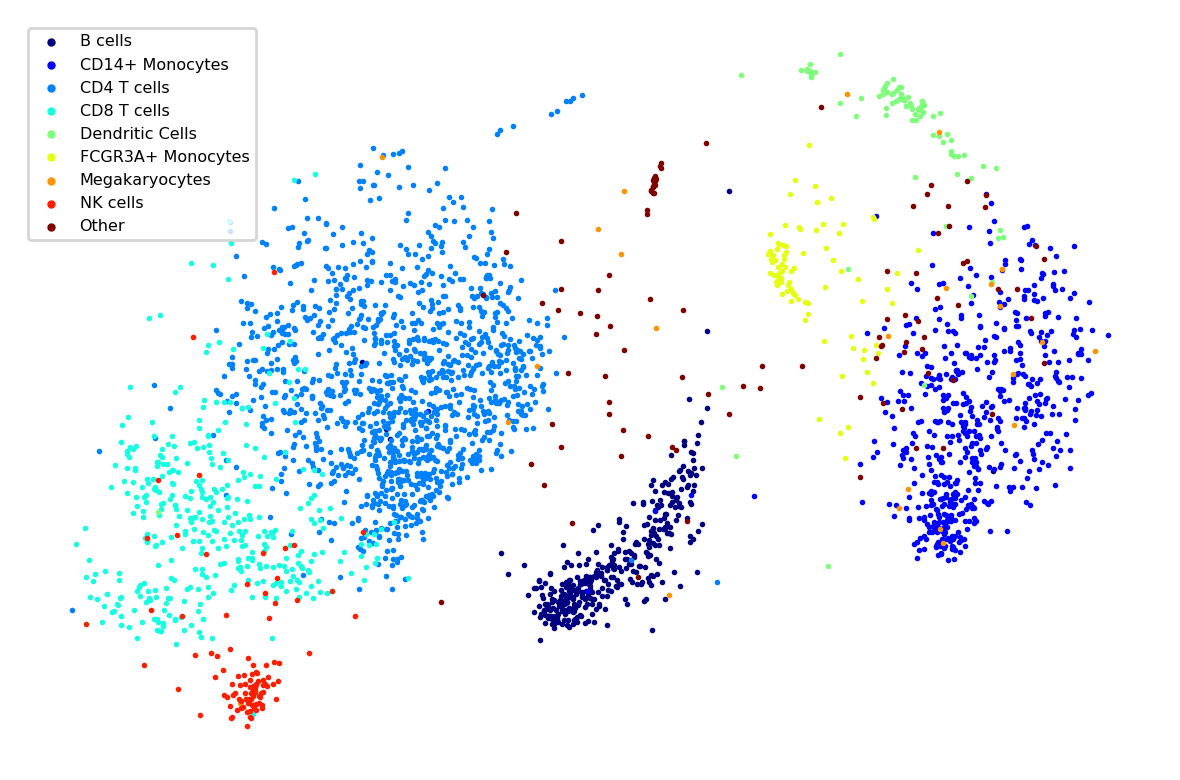

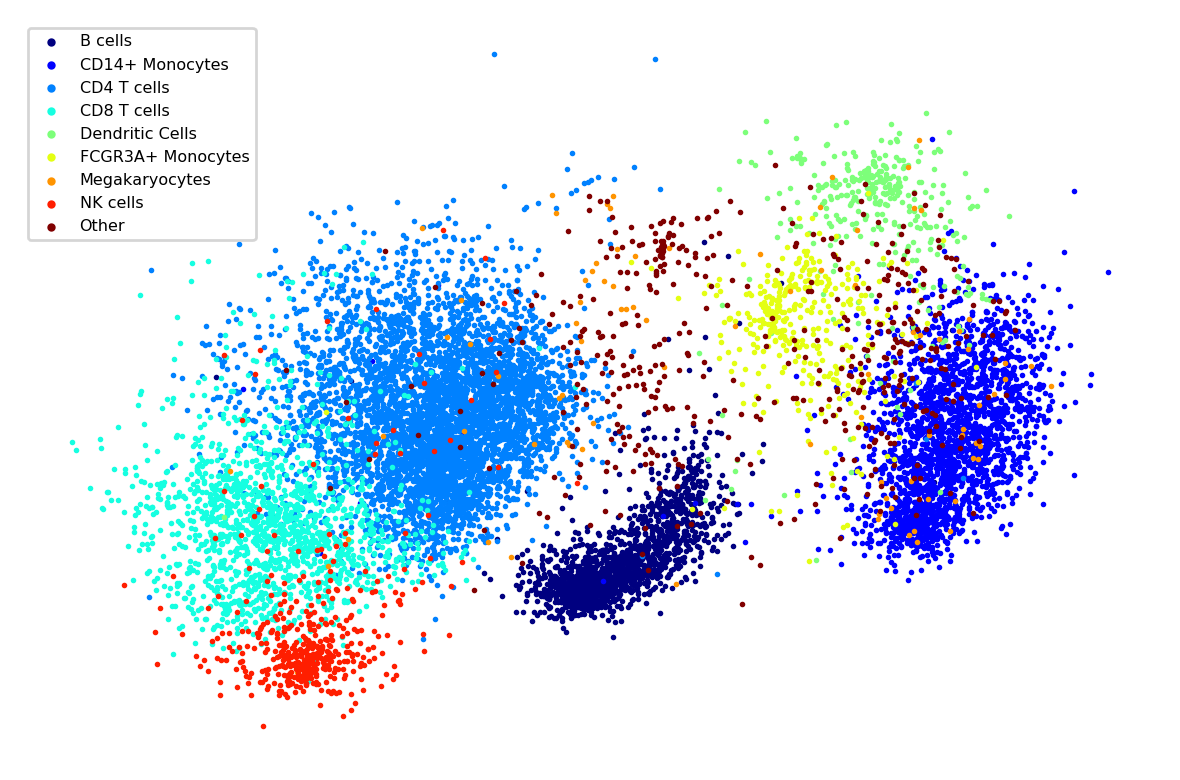

In [4]:
pbmc_dataset = PbmcDataset(save_path='../data/')
pbmc_dataset.log_shift()
pbmc_dataset.subsample_genes(500)  
pbmc_dataset.standardscale()
NEE = NeuralEE(pbmc_dataset, lam=10, device=device)
results_Neural = NEE.fine_tune(size=0.25)
scatter(results_Neural['X'].numpy(), results_Neural['sub_samples']['labels'], pbmc_dataset.cell_types)
results_map = NEE.map(calculate_error=None)
scatter(results_map['X'].numpy(), NEE.labels, pbmc_dataset.cell_types)

File ../data/retina.loom already downloaded
Preprocessing dataset
Finished preprocessing dataset
Downsampling from 13166 to 500 genes
Compute affinity on downsample
Neural Elastic Embedding, lambda=10, completed in 18.12s, EE loss is 1.518211


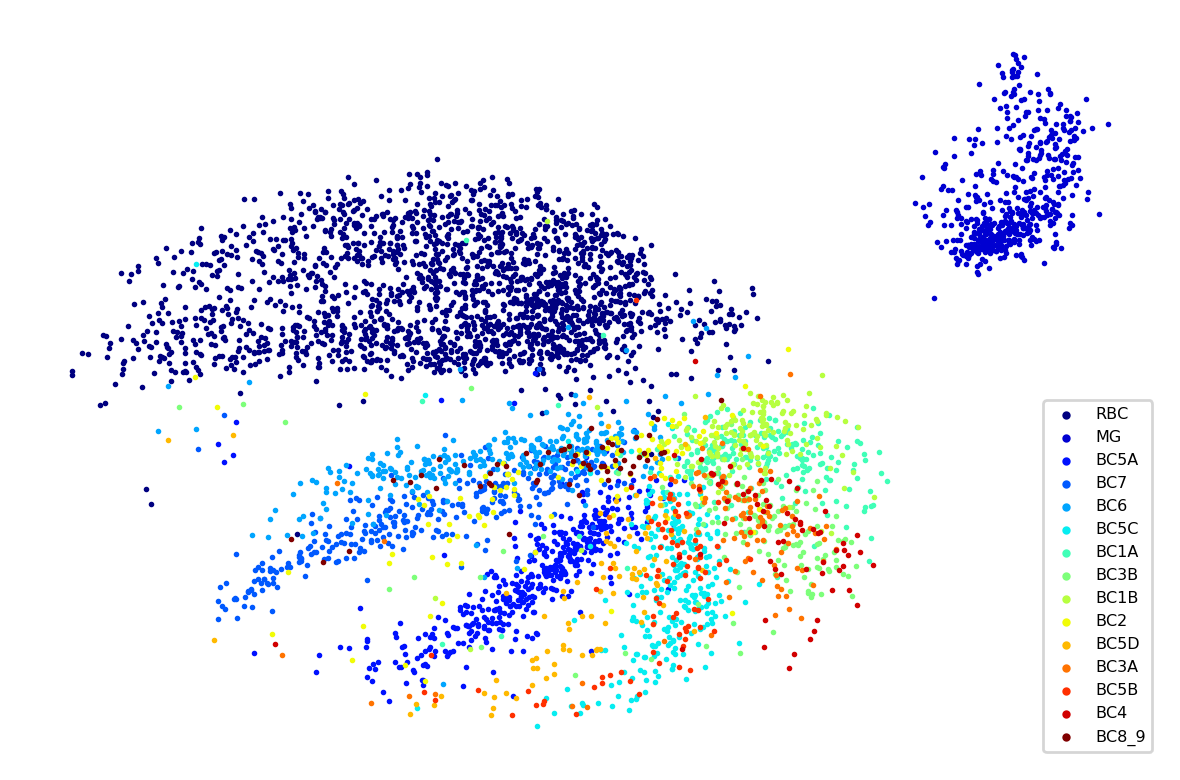

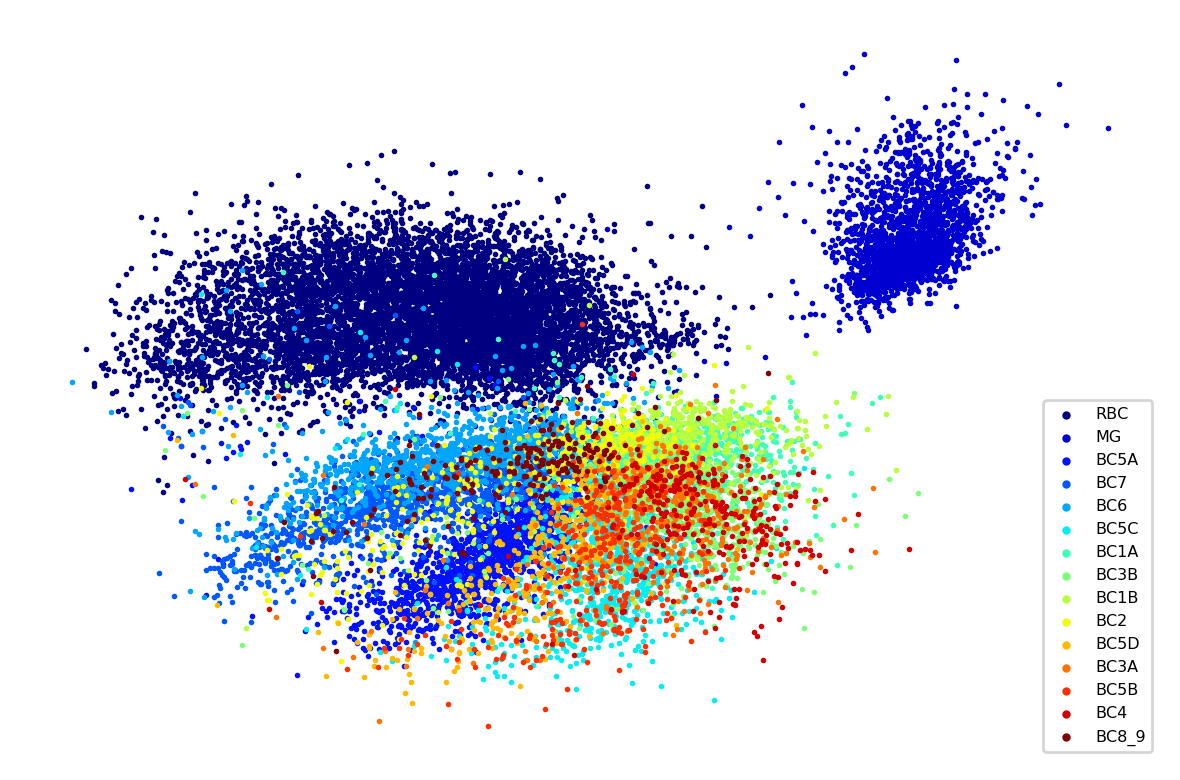

In [5]:
retina_dataset = RetinaDataset(save_path='../data/')
retina_dataset.log_shift()
retina_dataset.subsample_genes(500)  
retina_dataset.standardscale()
NEE = NeuralEE(retina_dataset, lam=10, device=device)
results_Neural = NEE.fine_tune(size=0.25)
scatter(results_Neural['X'].numpy(), results_Neural['sub_samples']['labels'], retina_dataset.cell_types)
results_map = NEE.map(calculate_error=None)
scatter(results_map['X'].numpy(), NEE.labels, retina_dataset.cell_types)